In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

Extent       Date
0     376618.799 1979-01-01
1     211788.726 1979-02-01
2     262868.141 1979-03-01
3     698377.304 1979-04-01
4    1252407.727 1979-05-01
..           ...        ...
533  1520776.003 2023-06-01
534  2076164.165 2023-07-01
535  2731799.027 2023-08-01
536  3179384.692 2023-09-01
537  3301335.210 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((515, 12, 1), (515,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2418 - root_mean_squared_error: 0.4917

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 8s 100ms/step - loss: 0.2430 - root_mean_squared_error: 0.4930 - val_loss: 0.2003 - val_root_mean_squared_error: 0.4475
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1774 - root_mean_squared_error: 0.4212

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.1672 - root_mean_squared_error: 0.4089 - val_loss: 0.1656 - val_root_mean_squared_error: 0.4070
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1313 - root_mean_squared_error: 0.3624

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1313 - root_mean_squared_error: 0.3624 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3744
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1085 - root_mean_squared_error: 0.3293

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.1085 - root_mean_squared_error: 0.3293 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3421
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0855 - root_mean_squared_error: 0.2924

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0863 - root_mean_squared_error: 0.2937 - val_loss: 0.0965 - val_root_mean_squared_error: 0.3107
Epoch 6/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0761 - root_mean_squared_error: 0.2759

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0783 - val_root_mean_squared_error: 0.2798
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0490 - root_mean_squared_error: 0.2214

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0529 - root_mean_squared_error: 0.2301 - val_loss: 0.0630 - val_root_mean_squared_error: 0.2510
Epoch 8/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0431 - root_mean_squared_error: 0.2075

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2251
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0299 - root_mean_squared_error: 0.1728

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0323 - root_mean_squared_error: 0.1798 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1967
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0279 - root_mean_squared_error: 0.1671

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1722
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0232 - root_mean_squared_error: 0.1523

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0227 - root_mean_squared_error: 0.1508 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1399

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0194 - root_mean_squared_error: 0.1395 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1178
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1197

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0149 - root_mean_squared_error: 0.1223 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0911
Epoch 14/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1145

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0786
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 16/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1243 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 18/50
52/53 [============================>.] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1138

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0644
Epoch 19/50
53/53 [==============================] - 0s 4ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0764
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0135 - root_mean_squared_error: 0.1160 - val_loss: 0.0137 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT12\assets


INFO:tensorflow:Assets written to: Indian_model_LT12\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0063 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.4495240767796835 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

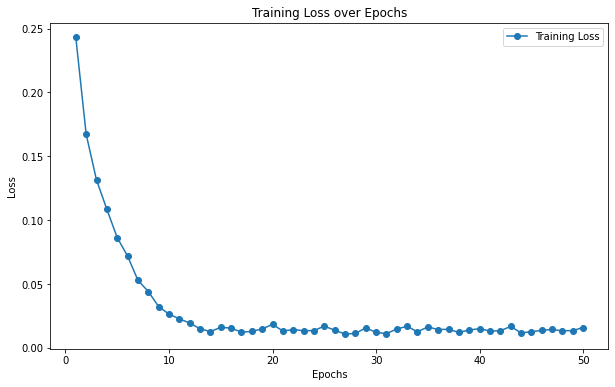

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

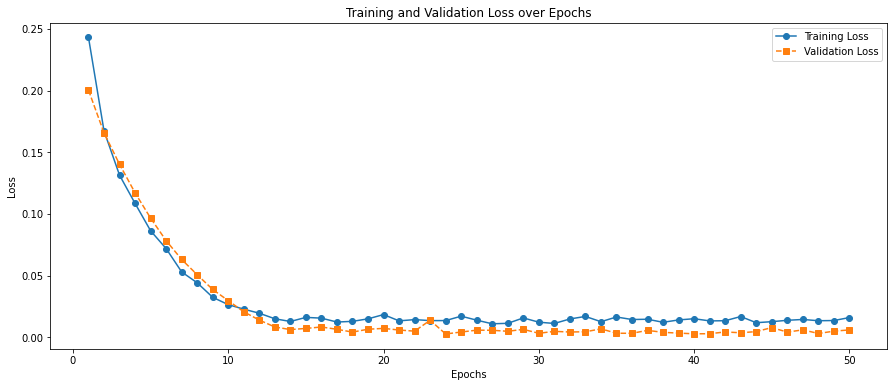

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.04538272767093631
MAE : 0.03653784332267223


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        6.143779e+05     827036.916
1        1.249699e+06    1142021.216
2        1.774211e+06    1885693.654
3        2.547802e+06    2542569.663
4        3.183370e+06    3107373.845
5        3.635535e+06    3488175.444
6        3.728257e+06    3746306.528
7        2.712512e+06    2942322.822
8        1.079657e+06    1507212.955
9        4.242091e+05     648507.437
10       2.448509e+05     352564.010
11       5.191037e+05     453587.503
12       8.982394e+05     841043.793
13       1.468636e+06    1433155.266
14       2.084344e+06    2163687.646
15       2.741458e+06    2848863.133
16       3.184708e+06    3420877.229
17       3.427886e+06    3752886.938
18       3.475481e+06    3778951.818
19       2.816345e+06    2892177.223
20       1.326194e+06    1467610.428
21       4.221436e+05     377930.941
22       1.340326e+05     146440.376
23       4.031575e+05     244356.473
24       7.304898e+05     612217.566
25       1.468866e+06    1261627.075
26       2.064161e+06    1720565.225
27       2.693417e+06    2564005.541
28       3.147140e+06    2983773.529
29       3.349064e+06    3372645.223
30       3.446170e+06    3589687.043
31       2.596224e+06    2669385.189
32       1.142417e+06    1095398.946
33       2.197659e+05     319828.826
34      -7.841990e+04     162541.182
35       1.491810e+05     179564.232
36       4.455620e+05     593196.107
37       1.242580e+06    1053508.835
38       1.709107e+06    1520776.003
39       2.600620e+06    2076164.165
40       2.991244e+06    2731799.027
41       3.424439e+06    3179384.692
42       3.380290e+06    3301335.210

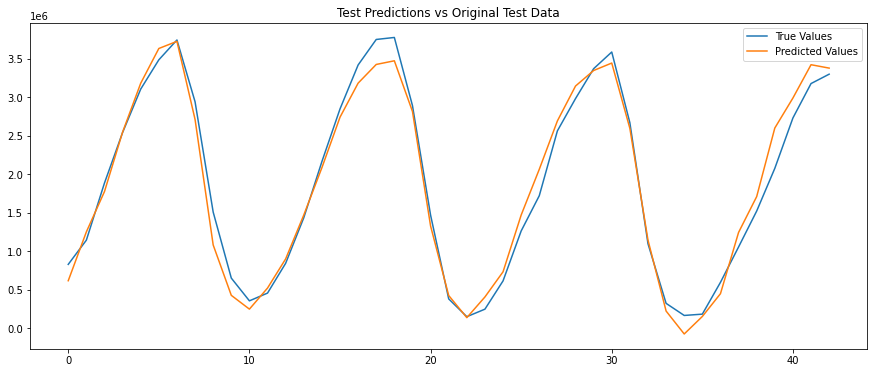

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

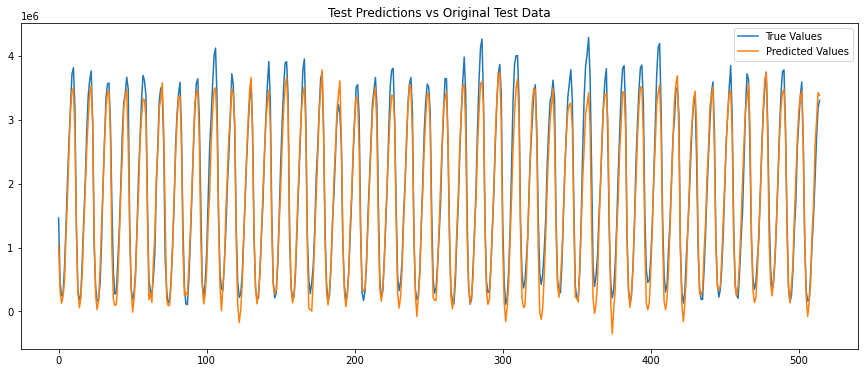

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()